In [1]:
url = "https://www.geopython.xyz/geodata/srtm/"

urllist = [url + "srtm_53_06.zip",
    url + "srtm_53_07.zip",
    url + "srtm_54_06.zip",
    url + "srtm_54_07.zip"]


In [2]:
fname = ["srtm_53_06",
         "srtm_53_07",
         "srtm_54_06",
         "srtm_54_07"]

In [4]:
import geoutils
import os


if not os.path.exists("uebung"):
    os.mkdir("uebung", mode=777)

for url in range(0, len(urllist)):
    geoutils.download(urllist[url], f"uebung/{fname[url]}.zip")

100% done 	[****************************************************************************************************]
100% done 	[****************************************************************************************************]
100% done 	[****************************************************************************************************]
100% done 	[****************************************************************************************************]


In [7]:
import os
import geoutils
for url in urllist:
    pfad = "uebung/" + os.path.basename(url)
    print(pfad)
    geoutils.unzip(pfad, f"uebung/files")
print("All files unzipped!")

uebung/srtm_53_06.zip
uebung/srtm_53_07.zip
uebung/srtm_54_06.zip
uebung/srtm_54_07.zip
All files unzipped!


## a) Erstellen Sie aus den Dateien einen virtuellen Datensatz (vrt) und die Overlays.

In [33]:
import glob
import subprocess

tiff_files = glob.glob("uebung/files/srtm_*.tif")
subprocess.run(["gdalbuildvrt", "uebung/everest.vrt"] + tiff_files)


CompletedProcess(args=['gdalbuildvrt', 'uebung/everest.vrt', 'uebung/files\\srtm_53_06.tif', 'uebung/files\\srtm_53_07.tif', 'uebung/files\\srtm_54_06.tif', 'uebung/files\\srtm_54_07.tif'], returncode=0)

In [35]:
!gdaladdo -r average uebung/everest.vrt 2 4 8 16 32


0...10...20...30...40...50...60...70...80...90...100 - done.


## b) Geländeschummerung

In [36]:
!gdal_translate -of GTiff uebung/everest.vrt uebung/everest.tif

Input file size is 12000, 12000
0...10...20...30...40...50...60...70...80...90...100 - done.


In [37]:
!gdaldem hillshade uebung/everest.tif uebung/everestHS.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


## c) Vektorfile mit Höhenlinien

In [40]:
!gdal_contour -a elev -i 250 uebung/everest.tif uebung/everest_contours.shp

0...10...20...30...40...50...60...70...80...90...100 - done.


## d) Höchster Punkt (mit Rasterio)

In [49]:
import rasterio
import numpy as np

data = rasterio.open("uebung/everest.tif")

elev = data.read()
maxv = np.max(elev)

print(maxv)

8806


## e) alles mit matplotlib -> imgshow darstellen 

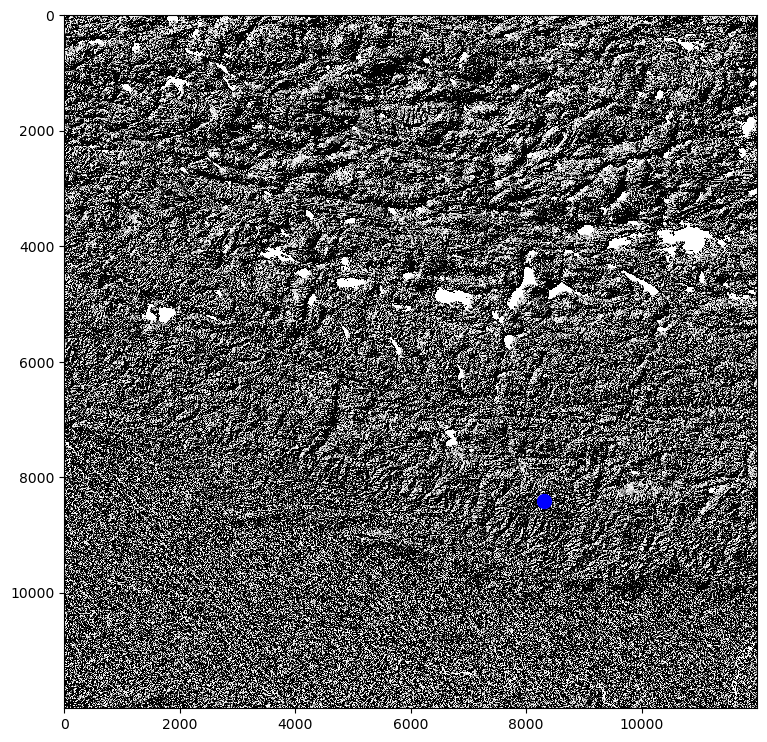

In [67]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

shade = rasterio.open("uebung/everestHS.tif")
px,py = ~shade.transform * (86.9252027537068, 27.98941911358151)
fig, ax = plt.subplots(figsize=(16,9))
ax = imshow(shade.read(1) , cmap='gray', interpolation="nearest");
plt.plot(px,py, "bo", markersize=10);
#cmap = 'grey' --> Graue Karte